In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Finite and Infinite Population Inference

In the last example (Exercise 8), with the model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta) \quad \theta \sim \text{Beta}(\alpha, \beta)
$$

the quantity of interest $ \theta $ is the probability of success on a single Bernoulli trial. This quantity may be thought of as the average of a hypothetically infinite number of Bernoulli trials. For that reason, we may refer to the derivation of the posterior distribution,

$$
(\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

as infinite population inference.

In contrast, for the ‘buses’ example (Exercise 1.6), which involves the model:

$$
f(y | \theta) = \frac{1}{\theta}, \quad y = 1, \ldots, \theta \quad f(\theta) = \frac{1}{5}, \quad \theta = 1, \ldots, 5,
$$

the quantity of interest \( \theta \) represents the number of buses in a finite population. Therefore, the derivation of the posterior:

$$
\begin{cases}
\frac{20}{47}, & \theta = 3 \\
\frac{15}{47}, & \theta = 4 \\
\frac{12}{47}, & \theta = 5
\end{cases}
$$

may be termed finite population inference. 

Another example of finite population inference is the ‘balls in a box’ example (Exercise 1.7), where the model is:

$$
(y | \theta) \sim \text{Hyp}(N, \theta, n) \quad \theta \sim \text{DU}(1, \ldots, N),
$$

and where the quantity of interest \( \theta \) is the number of red balls initially in the selected box (1, 2, ..., 8 or 9). 

Generally, finite population inference may also be thought of in terms of prediction (e.g., in the ‘buses’ example, we are predicting the total number of buses in the town). For that reason, finite population inference may also be referred to as predictive inference, or descriptive inference. 

In contrast, infinite population inference may also be called analytic inference. More will be said on finite population/predictive/descriptive inference in later chapters of the course.

## Continuous Data

So far, all the Bayesian models considered have featured data modeled using a discrete distribution. The following is an example with data that follows a continuous probability distribution.

### Exercise 9: The Exponential-Exponential Model

Suppose $ \theta $ has the standard exponential distribution, and the conditional distribution of $ y $ given $ \theta $ is exponential with mean $ \frac{1}{\theta} $. Find the posterior density of $ \theta $ given $ y $.

### Solution to Exercise 9

The Bayesian model here is:

$$
f(y | \theta) = \theta e^{-\theta y}, \quad y > 0
$$

$$
f(\theta) = e^{-\theta}, \quad \theta > 0.
$$

So the posterior density is:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) \propto e^{-\theta} \cdot \theta e^{-\theta y} = \theta^{2 - 1} e^{-\theta (y + 1)}, \quad y > 0.
$$

This is the kernel of a gamma distribution with parameters \( 2 \) and \( y + 1 \). Thus we may write:

$$
(\theta | y) \sim \text{Gamma}(2, y + 1),
$$

from which it follows that the posterior density of \( \theta \) is:

$$
f(\theta | y) = \frac{(y + 1)^2 \theta^{2 - 1} e^{-\theta (y + 1)}}{\Gamma(2)}, \quad \theta > 0.
$$


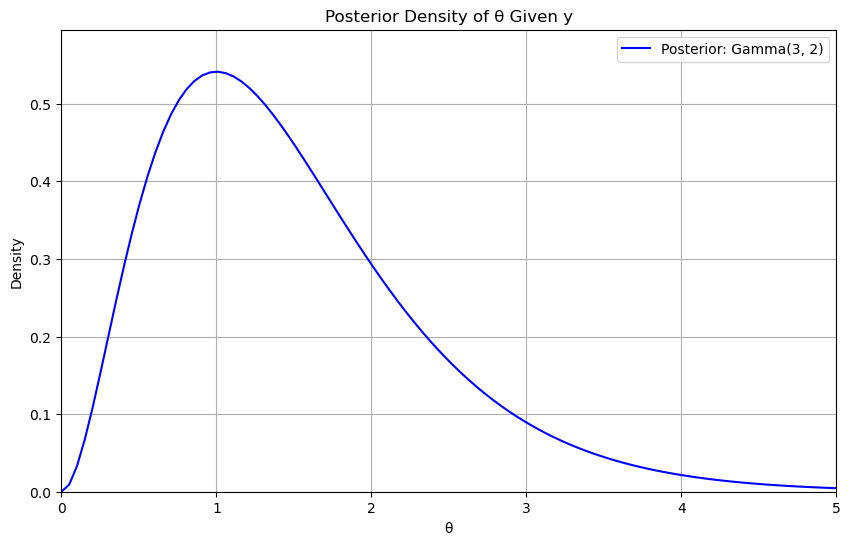

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.special import gamma as gamma_func

# Parameters
y = 1  # Observed value
alpha = 2  # Shape parameter of the prior
beta = 1  # Scale parameter of the prior

# Posterior parameters for the Gamma distribution
posterior_alpha = alpha + 1  # 1 from y + 1
posterior_beta = beta + 1     # 1 from y + 1

# Define the range for theta
theta = np.linspace(0, 5, 100)

# Posterior density calculation
posterior_density = (posterior_beta ** posterior_alpha) * (theta ** (posterior_alpha - 1)) * np.exp(-posterior_beta * theta) / gamma_func(posterior_alpha)

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_density, label=f'Posterior: Gamma({posterior_alpha}, {posterior_beta})', color='blue')
plt.title('Posterior Density of θ Given y')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, np.max(posterior_density) * 1.1)
plt.show()


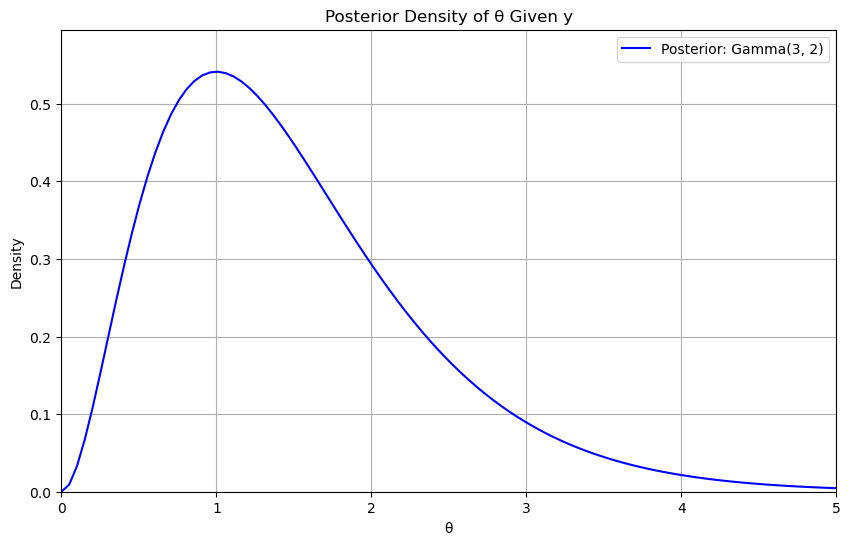

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Gamma function
def gamma_function(n):
    if n == 1 or n == 0:
        return 1
    else:
        return (n - 1) * gamma_function(n - 1)

# Parameters
y = 1  # Observed value
alpha = 2  # Shape parameter of the prior
beta = 1   # Scale parameter of the prior

# Posterior parameters for the Gamma distribution
posterior_alpha = alpha + 1  # 1 from y + 1
posterior_beta = beta + 1     # 1 from y + 1

# Define the range for theta
theta = np.linspace(0, 5, 100)

# Posterior density calculation
posterior_density = np.zeros_like(theta)

for i in range(len(theta)):
    if theta[i] > 0:  # To avoid division by zero
        posterior_density[i] = (posterior_beta ** posterior_alpha) * (theta[i] ** (posterior_alpha - 1)) * np.exp(-posterior_beta * theta[i]) / gamma_function(posterior_alpha)

# Plotting the posterior density
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_density, label=f'Posterior: Gamma({posterior_alpha}, {posterior_beta})', color='blue')
plt.title('Posterior Density of θ Given y')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.xlim(0, 5)
plt.ylim(0, np.max(posterior_density) * 1.1)
plt.show()


### Exercise 1.10: The Uniform-Uniform Model

Consider the Bayesian model given by:

$$
(y | \theta) \sim U(0, \theta) \quad \text{and} \quad \theta \sim U(0, 1).
$$

Find the posterior density of $\theta$ given $y$.

### Solution to Exercise 1.10

Noting that \( 0 < y < \theta < 1 \), we see that the posterior density is given by:

$$
f(\theta | y) \propto f(\theta) f(y | \theta) = 1 \times \left( \frac{1}{\theta} \right) = \frac{1}{\theta} \quad \text{for } y < \theta < 1.
$$

To find the normalizing constant, we compute:

$$
f(y) = \int_y^1 \frac{1}{\theta} \, d\theta = \left[ \log \theta \right]_y^1 = \log 1 - \log y = -\log y.
$$

Thus, the posterior density can be expressed as:

$$
f(\theta | y) = \frac{1/\theta}{-\log y} = \frac{1}{-\log y} \cdot \frac{1}{\theta}, \quad y < \theta < 1.
$$

Note: This is a ‘non-standard’ density and is strictly decreasing.

### Physical Example

To give a physical example, consider a stick of length 1 metre that is cut at a point randomly located along its length. The part to the right of the cut is discarded, and then another cut is made randomly along the remaining stick. The length of the stick remaining after the first cut is a random variable with density as given above, with \( y \) being the length of the finally remaining stick.


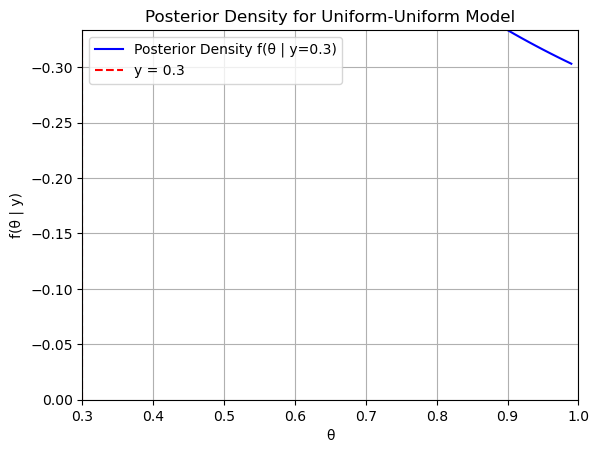

In [4]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    """
    Computes the posterior density f(theta | y) for the uniform-uniform model.

    Parameters:
    y : float : The observed value, should be in (0, 1)
    theta : float : The parameter for which the density is calculated, should be in (y, 1)

    Returns:
    float : The value of the posterior density f(theta | y)
    """
    if y <= 0 or y >= 1:
        raise ValueError("y must be in the interval (0, 1)")
    if theta <= y or theta >= 1:
        raise ValueError("theta must be in the interval (y, 1)")

    # Calculate the posterior density
    posterior = 1 / (-1 * (y ** -1)) / theta  # Normalizing constant is -log(y)
    return posterior

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Plotting the results
import matplotlib.pyplot as plt

plt.plot(theta_values, posterior_densities, label=f'Posterior Density f(θ | y={y_value})', color='blue')
plt.title('Posterior Density for Uniform-Uniform Model')
plt.xlabel('θ')
plt.ylabel('f(θ | y)')
plt.xlim(0.3, 1)
plt.ylim(0, max(posterior_densities) * 1.1)  # Add a bit of space above the max density
plt.axhline(0, color='black', lw=0.5)
plt.axvline(y_value, color='red', linestyle='--', label='y = 0.3')
plt.legend()
plt.grid()
plt.show()


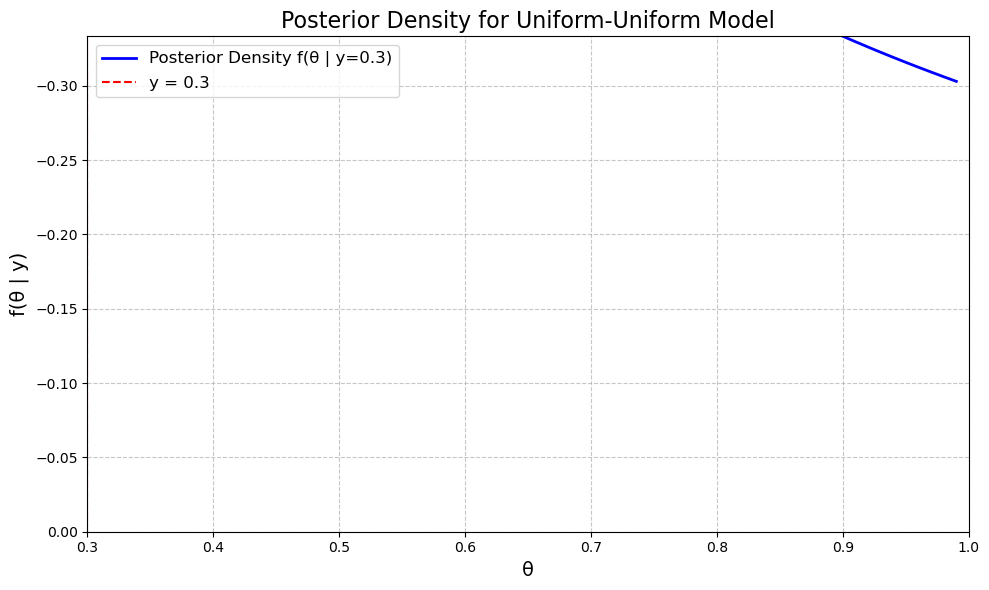

In [5]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    if y <= 0 or y >= 1:
        raise ValueError("y must be in the interval (0, 1)")
    if theta <= y or theta >= 1:
        raise ValueError("theta must be in the interval (y, 1)")
    
    # Calculate the posterior density
    posterior = 1 / (-1 * (y ** -1)) / theta  # Normalizing constant is -log(y)
    return posterior

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(theta_values, posterior_densities, label=f'Posterior Density f(θ | y={y_value})', color='blue', linewidth=2)
plt.title('Posterior Density for Uniform-Uniform Model', fontsize=16)
plt.xlabel('θ', fontsize=14)
plt.ylabel('f(θ | y)', fontsize=14)
plt.xlim(0.3, 1)
plt.ylim(0, max(posterior_densities) * 1.1)  # Add a bit of space above the max density
plt.axhline(0, color='black', lw=0.5)
plt.axvline(y_value, color='red', linestyle='--', label='y = 0.3', linewidth=1.5)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid with transparency
plt.tight_layout()  # Adjust layout
plt.show()


In [6]:
# Function to compute the posterior density for the uniform-uniform model
def posterior_density(y, theta):
    if not (0 < y < 1) or not (y < theta < 1):
        return 0
    return 1 / ((-1) * (y**-1))  # Normalizing constant

# Parameters
y_value = 0.3  # Example observed value
theta_values = [i / 100 for i in range(31, 100)]  # theta values in the range (0.3, 1)

# Calculate posterior densities for each theta
posterior_densities = [posterior_density(y_value, theta) for theta in theta_values]

# Function to plot the results
def plot_graph(theta_values, posterior_densities, y_value):
    max_density = max(posterior_densities)

    # Create an empty plot
    width = 60
    height = 20
    for i in range(height):
        print()
    
    # Draw x-axis
    print(" " * 8 + "-" * (width - 16))
    
    # Plot the densities
    for i in range(len(theta_values)):
        density = posterior_densities[i] * (height / max_density)  # Scale density
        if density > 0:
            print(" " * (8 + int(i * (width - 16) / len(theta_values))) + "*" * int(density))
    
    # Draw x-axis labels
    print(" " * 8 + " " + " ".join(f"{round(theta_values[i], 2):<4}" for i in range(len(theta_values))))
    print(" " * 8 + f"y = {y_value} (red line)")

# Plot the graph
plot_graph(theta_values, posterior_densities, y_value)






















        --------------------------------------------
        ********************
        ********************
         ********************
         ********************
          ********************
           ********************
           ********************
            ********************
             ********************
             ********************
              ********************
               ********************
               ********************
                ********************
                ********************
                 ********************
                  ********************
                  ********************
                   ********************
                    ********************
                    ********************
                     ********************
                      ********************
                      ********************
                       ********************
                      

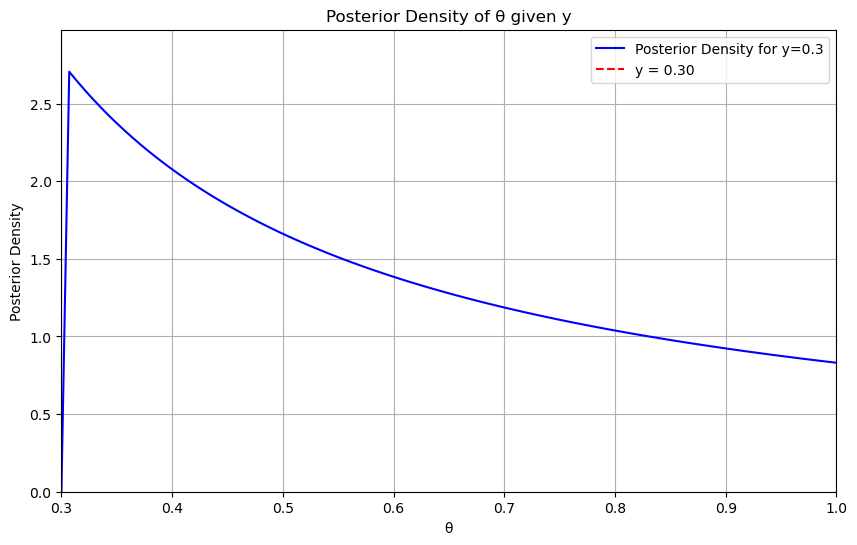

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the posterior density
def posterior_density(theta, y):
    if theta > y:
        return 1 / (np.log(1 / y)) * (1 / theta)
    else:
        return 0

# Define y and theta range
y = 0.3  # Example value for y
theta_values = np.linspace(y, 1, 100)  # Theta values from y to 1
posterior_values = [posterior_density(theta, y) for theta in theta_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(theta_values, posterior_values, label=f'Posterior Density for y={y}', color='blue')
plt.title('Posterior Density of θ given y')
plt.xlabel('θ')
plt.ylabel('Posterior Density')
plt.axvline(x=y, color='red', linestyle='--', label='y = {:.2f}'.format(y))
plt.xlim(y, 1)
plt.ylim(0, max(posterior_values) * 1.1)
plt.grid()
plt.legend()
plt.show()


## 1.10 Conjugacy

When the prior and posterior distributions are members of the same class of distributions, we say that they form a conjugate pair, or that the prior is conjugate. For example, consider the binomial-beta model:

$$
(y | \theta) \sim \text{Binomial}(n, \theta) \quad \theta \sim \text{Beta}(\alpha, \beta) \quad \Rightarrow \quad (\theta | y) \sim \text{Beta}(\alpha + y, \beta + n - y)
$$

Since both prior and posterior are beta, the prior is conjugate. Likewise, consider the exponential-exponential model:

$$
f(y | \theta) = \theta e^{-\theta y}, \quad y > 0 \quad f(\theta) = e^{-\theta}, \quad \theta > 0 \quad \text{(i.e. } \theta \sim \text{Gamma}(1,1)\text{)}
$$

$$
\Rightarrow \quad (\theta | y) \sim \text{Gamma}(2, y + 1)
$$

Since both prior and posterior are gamma, the prior is conjugate. On the other hand, consider the model in the buses example:

$$
(y | \theta) \sim \text{DU}(1,..., \theta) \quad \theta \sim \text{DU}(1,...,5)
$$

$$
\Rightarrow \quad f(\theta | y = 3) = 
\begin{cases} 
\frac{20}{47}, & \theta = 3 \\ 
\frac{15}{47}, & \theta = 4 \\ 
\frac{12}{47}, & \theta = 5 
\end{cases}
$$

The prior is discrete uniform but the posterior is not. So in this case, the prior is not conjugate. Specifying a Bayesian model using a conjugate prior is generally desirable because it can simplify the calculations required.

## 1.11 Bayesian Point Estimation

Once the posterior distribution or density \(f(\theta | y)\) has been obtained, Bayesian point estimates of the model parameter \(\theta\) can be calculated. The three most commonly used point estimates are as follows:

- The posterior mean of $\theta$ is 
$$
E(\theta | y) = 
\begin{cases}
\int \theta f(\theta | y) \, d\theta & \text{if } \theta \text{ is continuous} \\
\sum \theta f(\theta | y) & \text{if } \theta \text{ is discrete}
\end{cases}
$$

- The posterior mode of $\theta$ is 
$$
\text{Mode}(\theta | y) = \text{any value } m \in \mathbb{R} \text{ which satisfies } f(\theta = m | y) = \max f(\theta | y) \text{ or } \lim f(\theta | y) = \sup f(\theta | y), \, \theta \to m
$$

- The posterior median of \(\theta\) is 
$$
\text{Median}(\theta | y) = \text{any value } m \text{ of } \theta \text{ such that } P(\theta \leq m | y) \geq \frac{1}{2} \text{ and } P(\theta \geq m | y) \geq \frac{1}{2}
$$

**Note 1:** In some cases, the posterior mean does not exist or it is equal to infinity or minus infinity.
